# Pandas y Valores Faltandes




## Wine Reviews dataset

Vamos a trabajar con el siguiente dataset, que corresponde a reviews de vinos:

https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

Recomendamos leer su descripción y, cuando tengan tiempo, mirar algunos de los "kernels" que pueden encontrar en Kaggle.

1. Abrir el dataset e imprimir sus primeras instancias. Pueden descargarlo del link o usar el que está en el Trello.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_reviews = pd.read_csv('wine-reviews\winemag-data_first150k.csv')

In [3]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Luego, descartar la columna `'Unnamed: 0'`.

In [4]:
print("wine_reviews tiene: "+str(len(wine_reviews.columns))+" columnas" )
print(wine_reviews.columns) #imprimo columnas
del wine_reviews['Unnamed: 0']#borro columna pedida
print(wine_reviews.columns)

wine_reviews tiene: 11 columnas
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [5]:
wine_reviews.isnull().sum() # valores faltantes por columna


country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

4. ¿Cuál o cuáles son los vinos con más valores faltantes?

In [6]:
#min=11
#pos=0
#for i in range(len(wine_reviews.index)):
   # comparator=wine_reviews.iloc[i].count()#duelve el n de valores no nulos
    #if(comparator< min):
        #min=comparator
        #pos=i
        
        
#print("El vino con más valores faltantes es: ")
#print("faltan:"+ str(10-min)+" datos")
#wine_reviews.iloc[pos]""

wine_reviews[wine_reviews.isnull().sum(axis=1) >= wine_reviews.isnull().sum(axis=1).max()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
1540,Portugal,"If you like your Sauvignon Blanc herbal, then ...",NaN,84,NaN,Tejo,NaN,NaN,Sauvignon Blanc,Quinta da Alorna
3449,Austria,"A tender, floral aroma hovers over the glass i...",NaN,91,NaN,Wiener Gemischter Satz,NaN,NaN,White Blend,Stift Klosterneuburg
3493,Portugal,"This is a rich and smooth wine, full of impres...",NaN,90,NaN,Alentejano,NaN,NaN,Portuguese Red,Monte da Penha
...,...,...,...,...,...,...,...,...,...,...
150207,New Zealand,"Shows flashes of beauty on the nose, combining...",NaN,85,NaN,Hawke's Bay,NaN,NaN,Merlot-Cabernet Sauvignon,Crossroads
150209,New Zealand,Broad and soft in the mouth (there's nearly 3%...,NaN,85,NaN,Hawke's Bay,NaN,NaN,Gewürztraminer,Crossroads
150255,New Zealand,"Starts with scents of anise and blackberry, th...",NaN,85,NaN,Hawke's Bay,NaN,NaN,Syrah,Vidal
150261,New Zealand,"A bit heavy for Riesling, with pretty pear and...",NaN,85,NaN,Waipara,NaN,NaN,Riesling,Daniel Schuster


5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuáles son el peor y el mejor vino? Imprimir en pantalla sus características y su descripción. ¿Hay un solo vino que sea el mejor o el peor?

In [42]:
#el mejor  y peor vinos son subjetivos, por tanto se tomara como Mejor vino el que
#a igualdad de puntos tenga mejor precio.

wine_reviews_quality=wine_reviews.copy()
best_wines=wine_reviews_quality.groupby(['price']).apply(lambda wine_reviews_quality: wine_reviews_quality.loc[wine_reviews_quality.points.idxmax])
best_wines.head(10)





,country,description,designation,points,price,province,region_1,region_2,variety,winery
price,,,,,,,,,,
4.0,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
5.0,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,90,5.0,California,California,California Other,Syrah,Fusée
6.0,US,The grapes for this impressive Aussie-style Sh...,NaN,90,6.0,California,California,California Other,Shiraz,Delicato
7.0,Portugal,"A darkly tannic wine, very mineral, tasting of...",Serrado Colheita,90,7.0,Dão,NaN,NaN,Portuguese Red,Quinta do Serrado
8.0,US,"Pungent aromas of concentrated stone fruits, b...",Bacchus Vineyard,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Sauvignon Blanc,Arbor Crest
9.0,US,This could be called the signature white for B...,NaN,91,9.0,Washington,Columbia Valley (WA),Columbia Valley,Fumé Blanc,Barnard Griffin
10.0,Portugal,"This is a fine wine, with great structure and ...",Aliança Reserva,91,10.0,Dão,NaN,NaN,Portuguese Red,Caves Aliança
11.0,Portugal,This lightly wood-aged wine is slightly auster...,Seleção do Enólogo,92,11.0,Dão,NaN,NaN,Portuguese Red,Pedra Cancela
12.0,France,"This is smooth, rich and elegant, with black f...",Aydie l'Origine,93,12.0,Southwest France,Madiran,NaN,Tannat-Cabernet Franc,Château d'Aydie


## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [8]:
wine_reviews_copia = wine_reviews.copy()

In [9]:
wine_reviews_copia=wine_reviews_copia.dropna(axis='columns')
print("cantidad de instancias original: "+str(len(wine_reviews.index)))
print("cantidad de instancias final: "+str(len(wine_reviews_copia.index)))

cantidad de instancias original: 150930
cantidad de instancias final: 150930


2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [10]:
# Copiar el dataframe!
print("cantidad de columnas original: "+str(wine_reviews.columns))

cantidad de columnas original: Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


In [11]:
print("cantidad de columnas final: "+str(wine_reviews_copia.columns))

cantidad de columnas final: Index(['description', 'points', 'variety', 'winery'], dtype='object')


Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [12]:
# Copiar el dataframe!
wine_reviews_copia.dropna('index',thresh=3)

,description,points,variety,winery
0,This tremendous 100% varietal wine hails from ...,96,Cabernet Sauvignon,Heitz
1,"Ripe aromas of fig, blackberry and cassis are ...",96,Tinta de Toro,Bodega Carmen Rodríguez
2,Mac Watson honors the memory of a wine once ma...,96,Sauvignon Blanc,Macauley
3,"This spent 20 months in 30% new French oak, an...",96,Pinot Noir,Ponzi
4,"This is the top wine from La Bégude, named aft...",95,Provence red blend,Domaine de la Bégude
...,...,...,...,...
150925,Many people feel Fiano represents southern Ita...,91,White Blend,Feudi di San Gregorio
150926,"Offers an intriguing nose with ginger, lime an...",91,Champagne Blend,H.Germain
150927,This classic example comes from a cru vineyard...,91,White Blend,Terredora
150928,"A perfect salmon shade, with scents of peaches...",90,Champagne Blend,Gosset


In [13]:
#COMPLETAR

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [14]:
# Copiar el dataframe!
wine_reviews_copia.dropna('index',thresh=5)
wine_reviews_copia.head(20)

,description,points,variety,winery
0,This tremendous 100% varietal wine hails from ...,96,Cabernet Sauvignon,Heitz
1,"Ripe aromas of fig, blackberry and cassis are ...",96,Tinta de Toro,Bodega Carmen Rodríguez
2,Mac Watson honors the memory of a wine once ma...,96,Sauvignon Blanc,Macauley
3,"This spent 20 months in 30% new French oak, an...",96,Pinot Noir,Ponzi
4,"This is the top wine from La Bégude, named aft...",95,Provence red blend,Domaine de la Bégude
5,"Deep, dense and pure from the opening bell, th...",95,Tinta de Toro,Numanthia
6,Slightly gritty black-fruit aromas include a s...,95,Tinta de Toro,Maurodos
7,Lush cedary black-fruit aromas are luxe and of...,95,Tinta de Toro,Bodega Carmen Rodríguez
8,This re-named vineyard was formerly bottled as...,95,Pinot Noir,Bergström
9,The producer sources from two blocks of the vi...,95,Pinot Noir,Blue Farm


In [15]:
#COMPLETAR

**Moraleja**: el orden importa. Primero, podemos descartar aquellas columnas con muchos valores faltantes y después descartar aquellas instancias con valores faltantes.

**Para pensar:** ¿de qué tipo son las variables del dataset?¿Es lo mismo un valor faltante en `price` que en `variety`?

**Ejercicio**

Hasta ahora, estamos descartando columnas y/o instancias sin prestar mucha atención qué representa cada columna. Elegir alguno de los siguientes objetivos y hacer un manejo de valores faltantes que consideren apropiado para ese objetivo:

* Predecir el precio de un vino. 
* Predecir la variedad de un vino.

Prestar atención a si no hay información redundante en las columnas.


In [16]:
wine_reviews_copia1 = wine_reviews.copy()
wine_reviews_copia1['price'].isnull().sum()

13695

## Imputación de Valores Faltantes

La columna `price` tiene alrededor de 9 mil valores faltantes, pero no queremos descartarla ni descartar instancias por el simple hecho de que no sepamos su precio. Esto se debe a que el precio tiene mucha información y, eventualmente, puede ser la columna que querramos predecir. Además, no son tantos valores faltantes si consideramos la cantidad de instancias que tiene el dataset. Entonces:


1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [17]:
print("cálculo sobre atributo :price")
print("promedio: "+str(wine_reviews_copia1['price'].mean()))
print("moda: "+str(wine_reviews_copia1['price'].mode()))
print("mediana: "+str(wine_reviews_copia1['price'].median()))
print("desvío std: "+str(wine_reviews_copia1['price'].std()))


cálculo sobre atributo :price
promedio: 33.13148249353299
moda: 0    20.0
dtype: float64
mediana: 24.0
desvío std: 36.322536196491264


2. Imputar los valores faltantes en la columna `price` usando su valor medio.

In [18]:

wine_reviews_copia1['price'].fillna(wine_reviews_copia1['price'].mean(), inplace=True)


3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [19]:
print("nuevo cálculo sobre atributo :price")
print("promedio: "+str(wine_reviews_copia1['price'].mean()))
print("moda: "+str(wine_reviews_copia1['price'].mode()))
print("mediana: "+str(wine_reviews_copia1['price'].median()))
print("desvío std: "+str(wine_reviews_copia1['price'].std()))

nuevo cálculo sobre atributo :price
promedio: 33.131482493532985
moda: 0    33.131482
dtype: float64
mediana: 26.0
desvío std: 34.63543758965077


4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

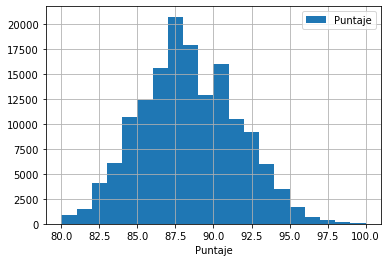

In [20]:
#plt.hist(COMPLETAR, bins= 20)
#plt.xlabel('Puntaje')
#plt.grid()
#plt.show()

plt.hist(wine_reviews_copia1['points'], label=['Puntaje'],bins=20)
plt.legend()
plt.xlabel('Puntaje')
plt.grid()
plt.show()



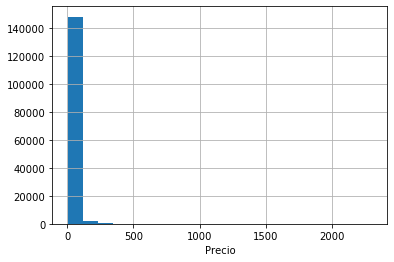

In [21]:
plt.hist(wine_reviews_copia1['price'], bins= 20)
plt.xlabel('Precio')
plt.grid()
plt.show()

Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

## Extra: Tripulación del Titanic

Si llegaste hasta acá y todavía tenés tiempo y ganas, te proponemos que explores el dataset de Supervivientes del Titanic. Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. Tenemos disponibles algunos datos sobre pasajeros/as del Titanic, que pueden descargar [acá](https://www.kaggle.com/c/titanic/) (solo el archivo `train.csv`) o descargar del Trello. La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.

### Análisis Exploratorio de Datos

1. Cargar los datos desde el archivo csv.
1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

**Para pensar**: ¿te parece que la supervivencia (o no) fue un proceso completamente *al azar* o existe algún mecanismo generador de estos datos?¿Qué nos enseñó la famosa película de David Cameron?